<a href="https://colab.research.google.com/github/hussaintaniya/spotifyanalysis/blob/main/predictionofuserlikeness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple Spotify Analysis by Machine Learning

In [10]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [11]:
#import the dataset
data= pd.read_csv("data.csv")
songs=data.sort_values(by="liked",ascending=False,ignore_index=True)
Prediction=data
songs


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.747,0.666,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1
1,0.853,0.616,6,-8.239,0,0.2640,0.0104,0.000000,0.0644,0.691,125.059,130560,4,1
2,0.567,0.797,1,-3.071,0,0.2000,0.3920,0.000000,0.1160,0.654,110.882,218732,3,1
3,0.700,0.719,5,-6.120,1,0.0900,0.7250,0.000000,0.1160,0.429,143.971,149013,4,1
4,0.883,0.558,1,-6.382,0,0.2080,0.5420,0.000002,0.0934,0.537,153.990,204179,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.263,0.202,1,-17.687,1,0.0408,0.9840,0.905000,0.0890,0.120,71.462,545747,4,0
191,0.779,0.705,4,-7.834,0,0.0827,0.2770,0.000000,0.0804,0.228,103.048,233597,4,0
192,0.701,0.341,1,-12.260,0,0.0418,0.4990,0.903000,0.3590,0.163,105.513,151507,3,0
193,0.620,0.573,0,-11.893,1,0.0423,0.2710,0.000000,0.0607,0.897,81.548,231333,4,0


In [12]:
#check for any data being null
data.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [13]:
#check if the data is duplicate
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool

In [14]:
songs.shape

(195, 14)

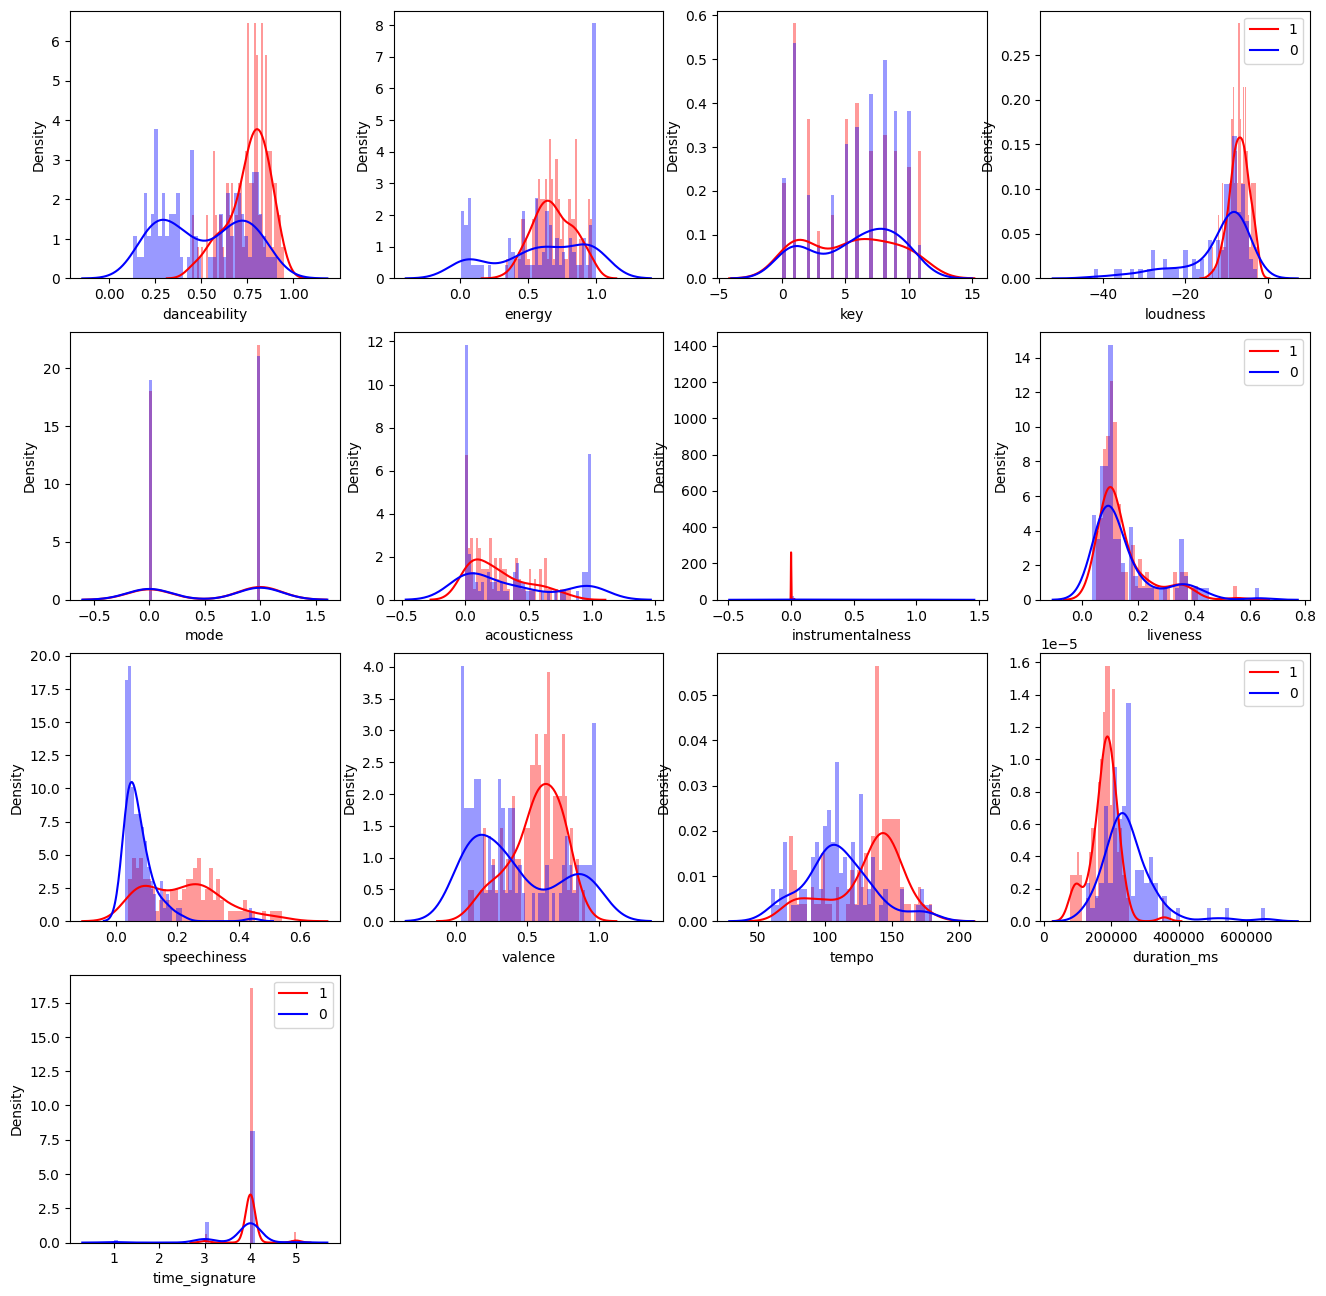

In [15]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['liked']==1]['danceability'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['liked']==1]['energy'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['liked']==1]['key'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['liked']==1]['loudness'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

plt.subplot(4,4,5)
sns.distplot(songs[songs['liked']==1]['mode'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,6)
sns.distplot(songs[songs['liked']==1]['acousticness'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,7)
sns.distplot(songs[songs['liked']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,8)
sns.distplot(songs[songs['liked']==1]['liveness'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))


plt.subplot(4,4,9)
sns.distplot(songs[songs['liked']==1]['speechiness'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['speechiness'], color='blue', bins=40)
plt.subplot(4,4,10)
sns.distplot(songs[songs['liked']==1]['valence'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,11)
sns.distplot(songs[songs['liked']==1]['tempo'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,12)
sns.distplot(songs[songs['liked']==1]['duration_ms'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['duration_ms'], color='blue', bins=40)
plt.legend((1,0))

plt.subplot(4,4,13)
sns.distplot(songs[songs['liked']==1]['time_signature'], color='red', bins=40)
sns.distplot(songs[songs['liked']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))


In [16]:
#logistic Regression
X_train = Prediction.drop('liked', axis=1)
X_test = songs.drop(['liked'], axis=1)
y_train = Prediction['liked']
y_test = songs['liked']
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4


In [17]:
X_test.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.747,0.666,11,-7.845,1,0.197,0.1300,0.000000,0.3600,0.531,77.507,177213,4
1,0.853,0.616,6,-8.239,0,0.264,0.0104,0.000000,0.0644,0.691,125.059,130560,4
2,0.567,0.797,1,-3.071,0,0.200,0.3920,0.000000,0.1160,0.654,110.882,218732,3
3,0.700,0.719,5,-6.120,1,0.090,0.7250,0.000000,0.1160,0.429,143.971,149013,4
4,0.883,0.558,1,-6.382,0,0.208,0.5420,0.000002,0.0934,0.537,153.990,204179,4


In [18]:
y_train.tail()

190    0
191    0
192    0
193    1
194    1
Name: liked, dtype: int64

In [19]:
y_test.head()

0    1
1    1
2    1
3    1
4    1
Name: liked, dtype: int64

In [20]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print(confusion_matrix(y_test, lr_pred))
print('\n')
print(classification_report(y_test, lr_pred))


[[70 25]
 [24 76]]


              precision    recall  f1-score   support

           0       0.74      0.74      0.74        95
           1       0.75      0.76      0.76       100

    accuracy                           0.75       195
   macro avg       0.75      0.75      0.75       195
weighted avg       0.75      0.75      0.75       195



Hence, the accuracy of Logistic regression prediction is 75%